<a href="https://colab.research.google.com/github/lukaszplust/data-science-learn/blob/main/pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sieci neuronowe

### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów). 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.8.2


In [4]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [6]:
print(X_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  2

In [7]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [8]:
#255 -> maksymalna wartosc dla piksela
X_train = X_train / 255.
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

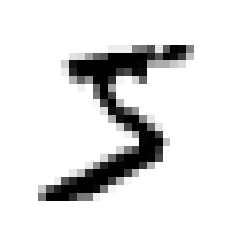

In [9]:
#wyswietlenie dla 0
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

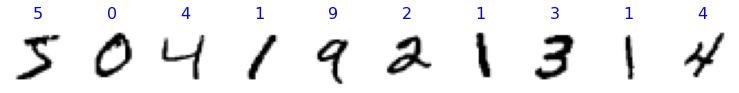

In [33]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='blue', fontsize=16)
plt.show()

In [14]:
#tworzymy instancje klasy
model = Sequential()
# dodawanie warst, która wypłaszcza dane, siec spodziewa się danych 28x28
model.add(Flatten(input_shape=(28,28)))

#wartswa gęsto połączona
#units = neurone ukryte(hidden) -> jest ich 128
#funkcja aktwyacji relu -> zeruje wartości ujemne, wartości dodatnie pozostawia bez zmian
model.add(Dense(units=128, activation='relu'))
#Dropout porzuca (w tym przypadku 20% neuronów) w warstwie
model.add(Dropout(0.2))
# warstwa wynikowa,wyjściowa
#softmax -> zwraca prawdopodobieństwo poszczególnej klasy
model.add(Dense(units=10, activation='softmax'))


#kompilowanie modelu
#loss => funkcja straty
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#informacje na temat modelu
model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
#flatten_3 = 784 -> 28 x 28 (None,784) - > None rezerwacja liczb próbek
#Dense param # oznacza ilosć parametrów do przetrenowania

Trenowanie modelu

In [18]:
history = model.fit(X_train, y_train, epochs=5)
#epochs -> ile razy zbiór danych przejdzie przez sieć

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0662 - accuracy: 0.9789
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9810
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0483 - accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - accuracy: 0.9850


Ocena modelu

In [19]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0717 - accuracy: 0.9806 - 990ms/epoch - 3ms/step


[0.07167389243841171, 0.9805999994277954]

In [20]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.066248,0.978883
1,0.057944,0.981033
2,0.053697,0.982117
3,0.048297,0.984350
4,0.045295,0.984967


In [21]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

In [22]:
#predykcja na podstawie modelu zwraca wartość pradopodobieństwa dla każdej klasy
model.predict(X_test)

array([[0.000000000032, 0.000000000041, 0.000001092994, ..., 0.9999862     , 0.000000000455, 0.000000026729],
       [0.000000000024, 0.000000447561, 0.9999995     , ..., 0.            , 0.000000000012, 0.            ],
       [0.000000000029, 0.99993217    , 0.000000940914, ..., 0.000053466694, 0.000003492836, 0.000000003619],
       ...,
       [0.            , 0.            , 0.            , ..., 0.000000209761, 0.000000001132, 0.00001121512 ],
       [0.000000000002, 0.            , 0.            , ..., 0.000000000005, 0.000001413938, 0.000000000001],
       [0.000000000033, 0.            , 0.000000000088, ..., 0.            , 0.000000000004, 0.            ]],
      dtype=float32)

In [27]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [28]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [30]:
#elementy błędnie zinterpretowane przez model
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([18, 247, 321, 340, 381, 445, 447, 449, 495, 551], dtype='int64')

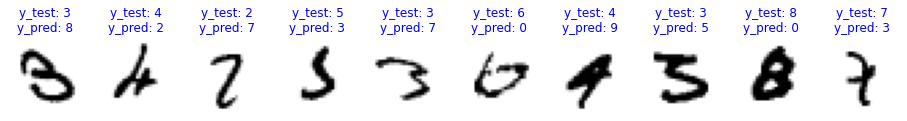

In [34]:
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='blue', fontsize=12)
plt.show()